# **Overview**

In [1]:
!pip install matplotlib pandas numpy scipy seaborn mne
!pip install beautifulsoup4 requests wget
!pip install h5py tables kaggle
!pip install wfdb pyEDFlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 75.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=7e75718dc7b9fa270b9f1c57df208704e910d99980b5d481b60ba33171629dcb
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 71.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of 

In [2]:
import kagglehub

path = kagglehub.dataset_download("harunshimanto/epileptic-seizure-recognition")
print("Path to dataset files:", path)

100%|██████████| 2.77M/2.77M [00:00<00:00, 103MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/harunshimanto/epileptic-seizure-recognition/versions/2


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os

In [58]:
import shutil

shutil.copy(
    '/root/.cache/kagglehub/datasets/harunshimanto/epileptic-seizure-recognition/versions/2/Epileptic Seizure Recognition.csv',
    'Epileptic_Seizure_Recognition.csv'
)

'Epileptic_Seizure_Recognition.csv'

In [60]:
epil = pd.read_csv('Epileptic_Seizure_Recognition.csv')
epil = epil.drop(columns = epil.columns[0])
epil.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


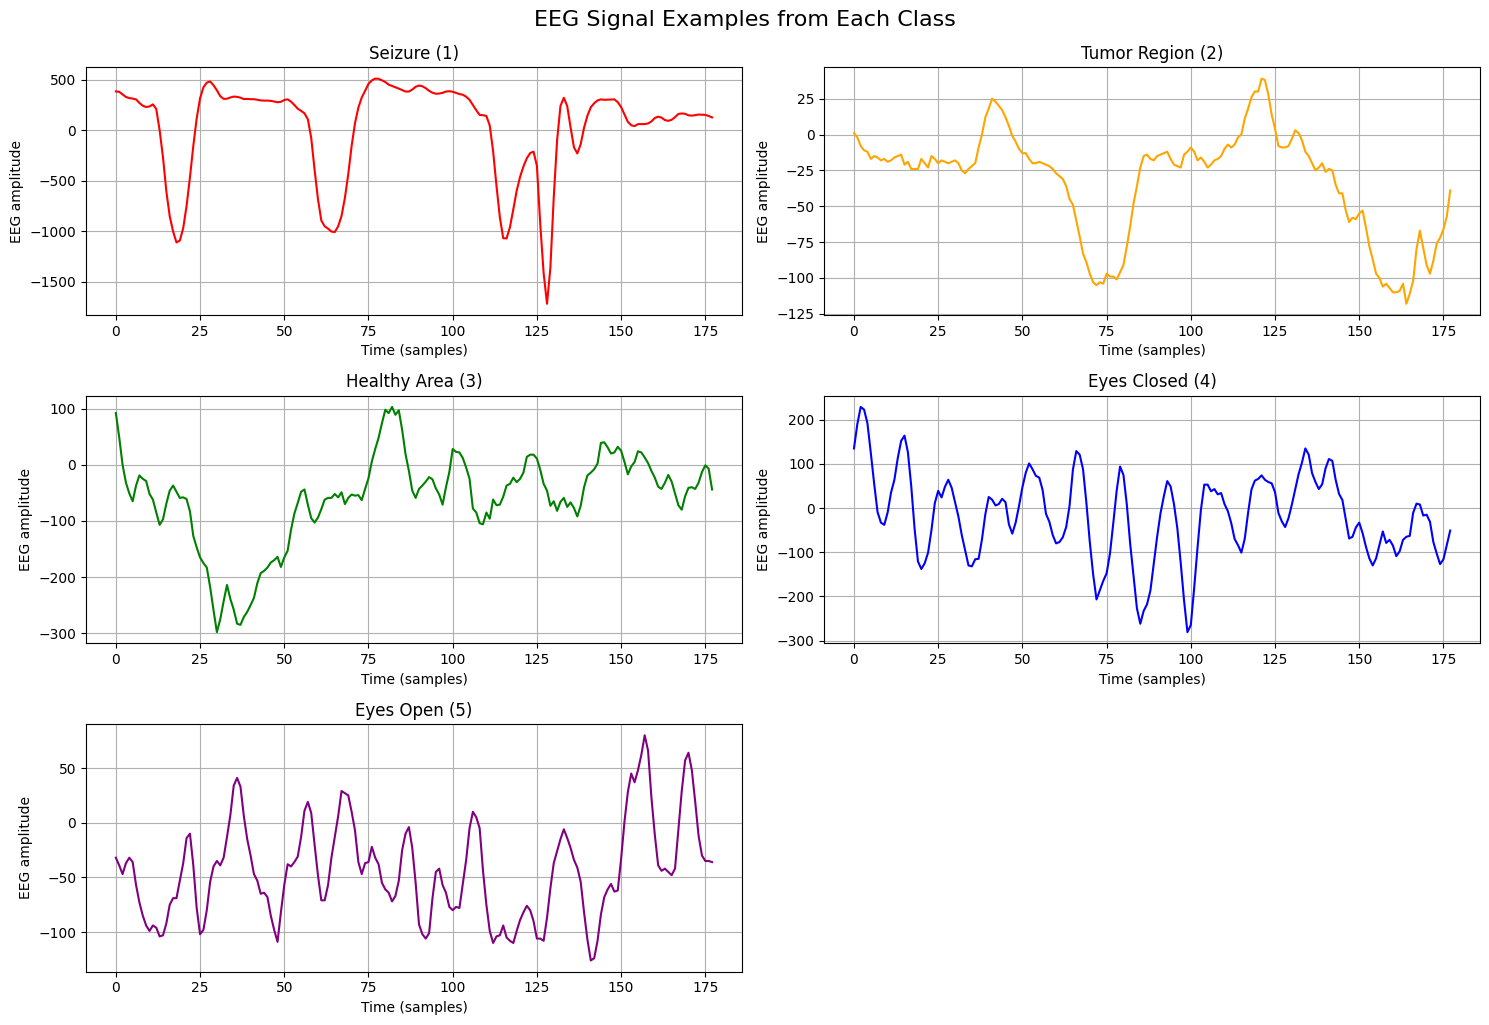

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

classes = [1, 2, 3, 4, 5]
colors = ['red', 'orange', 'green', 'blue', 'purple']
labels = [
    'Seizure (1)',
    'Tumor Region (2)',
    'Healthy Area (3)',
    'Eyes Closed (4)',
    'Eyes Open (5)'
]

plt.figure(figsize=(15, 10))
for i, cls in enumerate(classes):
    sample = epil[epil['y'] == cls].iloc[0, :-1].values
    plt.subplot(3, 2, i+1)
    plt.plot(sample, color=colors[i])
    plt.title(labels[i])
    plt.xlabel("Time (samples)")
    plt.ylabel("EEG amplitude")
    plt.grid(True)

plt.tight_layout()
plt.suptitle("EEG Signal Examples from Each Class", fontsize=16, y=1.02)
plt.show()

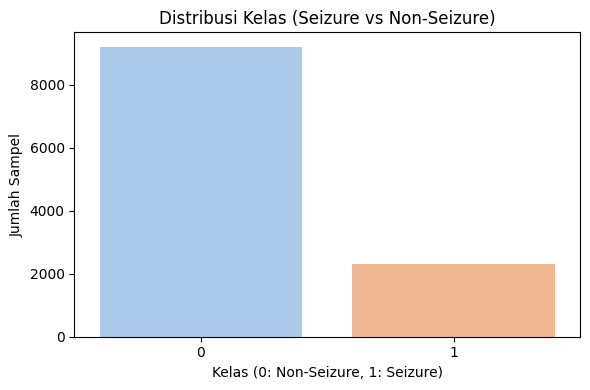

The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


In [6]:
tgt = epil.y.copy()
tgt.loc[tgt > 1] = 0

plt.figure(figsize=(6, 4))
ax = sn.countplot(x=tgt, hue=tgt, palette="pastel", legend=False)
ax.set_title("Distribusi Kelas (Seizure vs Non-Seizure)")
ax.set_xlabel("Kelas (0: Non-Seizure, 1: Seizure)")
ax.set_ylabel("Jumlah Sampel")
plt.tight_layout()
plt.show()

non_seizure, seizure = tgt.value_counts().sort_index()

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 8),
                textcoords='offset points')

plt.show()

print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)


In [7]:
epil = epil.copy()
epil['y'] = epil['y'].apply(lambda val: 0 if val > 1 else val)

epil_baseline_df = epil[epil['y'] == 0].reset_index(drop=True)
epil_seizure_df = epil[epil['y'] == 1].reset_index(drop=True)

print("Baseline shape:", epil_baseline_df.shape)
print("Seizure shape:", epil_seizure_df.shape)

Baseline shape: (9200, 179)
Seizure shape: (2300, 179)


In [8]:
import mne

channel_names = [f'X{i}' for i in range(1, 179)]
channel_type = ['eeg'] * 178
sample_rate = 173.61

info = mne.create_info(ch_names=channel_names, sfreq=sample_rate,
                       ch_types=channel_type)

display(info)

<Info | 7 non-empty values
 bads: []
 ch_names: X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, ...
 chs: 178 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 86.8 Hz
 meas_date: unspecified
 nchan: 178
 projs: []
 sfreq: 173.6 Hz
>

In [9]:
def mne_object(data, info, output=False):
    data = data.drop(columns=['y'])
    data = data.apply(lambda x: x*1e-6)
    data_T = data.transpose()
    raw = mne.io.RawArray(data_T, info)

    return raw

epil_baseline_mne = mne_object(epil_baseline_df, info)
epil_seizure_mne = mne_object(epil_seizure_df, info)

Creating RawArray with float64 data, n_channels=178, n_times=9200
    Range : 0 ... 9199 =      0.000 ...    52.987 secs
Ready.
Creating RawArray with float64 data, n_channels=178, n_times=2300
    Range : 0 ... 2299 =      0.000 ...    13.242 secs
Ready.


# **Pre-processing**

In [10]:
import mne

def mne_object(data, freq):

    ch_names = [str(col) for col in data.columns]

    info = mne.create_info(
        ch_names=ch_names,
        sfreq=freq,
        ch_types=['eeg'] * len(ch_names)
    )

    data_volts = data.astype(float).apply(lambda x: x * 1e-6)

    data_T = data_volts.to_numpy().T

    raw = mne.io.RawArray(data_T, info)

    return raw

In [11]:
import mne

if epil_baseline_mne is not None and epil_baseline_mne.n_times > 0:
    epil_baseline_filtered = epil_baseline_mne.copy().filter(l_freq=0.5, h_freq=40.0, fir_design='firwin')
else:
    print("Skipping filtering for epil_baseline_mne as it is empty.")
    epil_baseline_filtered = None

if epil_seizure_mne is not None and epil_seizure_mne.n_times > 0:
    epil_seizure_filtered = epil_seizure_mne.copy().filter(l_freq=0.5, h_freq=40.0, fir_design='firwin')
else:
    print("Skipping filtering for epil_seizure_mne as it is empty.")
    epil_seizure_filtered = None

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1147 samples (6.607 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1147 samples (6.607 s)



[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.1s finished


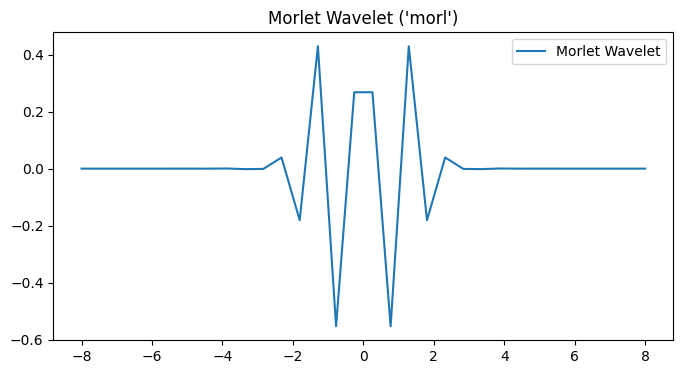

In [12]:
import pywt
import matplotlib.pyplot as plt

wavelet = pywt.ContinuousWavelet('morl')

fig, ax = plt.subplots(figsize=(8, 4))
[psi, x] = wavelet.wavefun(level=5)
ax.plot(x, psi, label="Morlet Wavelet")
ax.set_title("Morlet Wavelet ('morl')")
ax.legend()
plt.show()

In [13]:
from pywt import scale2frequency, cwt
import numpy as np

def cwt_wavelet_decompose(data, freq, waveletname, output=False):

    scales = np.arange(0.25, (freq/20)+0.25, 0.1)
    frequencies = scale2frequency(waveletname, scales) / (freq*0.0001)

    data_t = data.transpose()

    coeffs_list = cwt(data_t.values, scales, waveletname)

    decom_wavelets = pd.DataFrame(coeffs_list[0][:,0,:], index =np.round(frequencies, 2)).T

    if output:
        display(decom_wavelets.head())

    return decom_wavelets

print('Baseline Wavelets')
baseline_wavelets = cwt_wavelet_decompose(epil_baseline_df, sample_rate, 'morl', output=True)
print()
print('Seizure Wavelets')
seizure_wavelets = cwt_wavelet_decompose(epil_seizure_df, sample_rate, 'morl',  output=True)

Baseline Wavelets


,187.20,133.72,104.00,85.09,72.00,62.40,55.06,49.26,44.57,40.70,...,5.89,5.81,5.74,5.67,5.60,5.54,5.47,5.41,5.35,5.29
0,0.002767,5.237771,-13.247236,-16.484077,17.173482,1.065441,14.513700,34.876948,41.660502,22.495204,...,32.436241,36.150019,42.484492,46.066674,19.696731,25.493911,25.667402,27.837790,29.493040,7.573128
1,0.002725,4.144977,-6.919358,0.196141,-26.791768,1.098038,27.614357,9.872657,-31.478236,-50.279988,...,-10.101009,-3.054989,-1.427398,12.119618,-23.221295,-21.689755,-16.659471,0.938835,-1.614057,-31.566834
2,-0.003665,-3.043677,7.655562,9.548089,-11.792182,-1.487409,-7.589781,-28.151876,-27.558890,7.436169,...,-54.394448,-46.711738,-38.173487,-33.718821,-61.081072,-56.240315,-41.314500,-41.994112,-28.853757,-53.225395
3,-0.001618,-3.231192,5.844442,1.554675,16.226434,-0.824734,-17.892045,-6.839275,22.464410,31.674785,...,-76.666719,-73.627781,-62.985122,-62.517418,-68.570608,-60.762725,-60.885505,-62.195505,-54.804590,-51.536951
4,0.002522,3.672303,-8.920706,-10.342837,8.610294,1.063581,8.160538,21.596094,18.387860,-8.413694,...,-65.799922,-65.288633,-71.022193,-69.187470,-51.973518,-58.498483,-64.804960,-60.221085,-61.247478,-50.710040



Seizure Wavelets


,187.20,133.72,104.00,85.09,72.00,62.40,55.06,49.26,44.57,40.70,...,5.89,5.81,5.74,5.67,5.60,5.54,5.47,5.41,5.35,5.29
0,0.009479,22.123275,-53.595664,-61.044294,43.346130,3.733650,63.600299,117.133574,115.761499,43.025013,...,-43.868430,-38.433700,-12.133929,10.382505,-88.527551,-90.543111,-83.675898,-92.213665,-61.722789,-155.678157
1,0.001567,1.275921,5.804444,29.310953,-98.322898,0.916545,37.140512,-45.759531,-168.055956,-189.602844,...,-135.906927,-110.021524,-146.248908,-123.936047,-171.578619,-190.339303,-178.741703,-136.775720,-142.130267,-188.350585
2,-0.014379,-22.956562,49.076916,39.684658,24.529606,-6.072315,-81.949764,-91.122967,11.195230,157.522050,...,-198.742977,-206.744381,-175.368214,-198.817415,-191.508290,-164.867902,-146.767257,-183.590203,-169.135135,-97.114851
3,0.009804,20.984664,-53.674200,-68.865611,75.152319,3.634643,36.938752,120.204847,155.706915,46.896841,...,-160.473006,-180.048913,-160.251680,-149.386624,-92.766434,-97.150565,-130.697571,-125.381158,-139.652607,-50.384907
4,0.001294,-4.299773,18.114429,39.949654,-92.976517,1.237314,9.980902,-63.772734,-182.616590,-214.404240,...,-55.515318,-53.780160,-118.992367,-113.282170,15.912203,-38.108672,-28.502965,-20.317088,-27.898410,60.669757


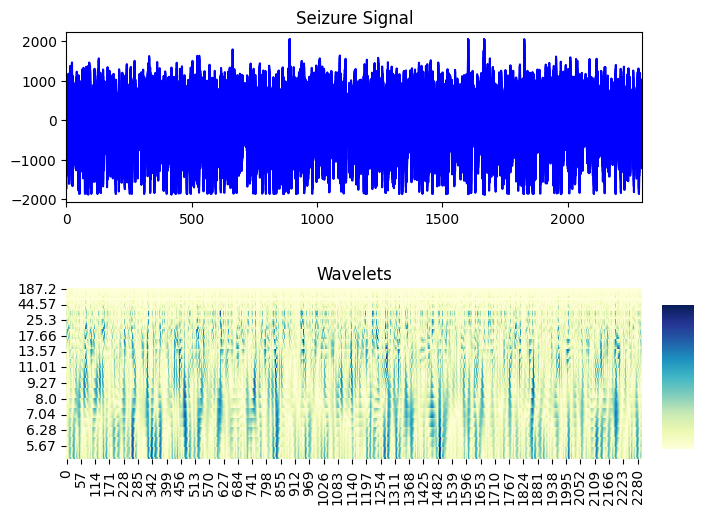

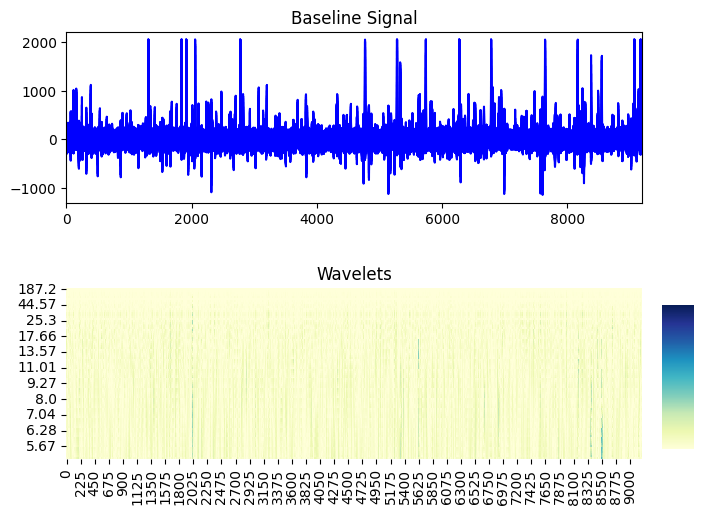

In [14]:
import seaborn as sns
def plot_cwt_scalogram(signal, wt_data, interpolation, class_name):

  cmap = plt.cm.cool
  x = range(len(signal))

  fig, (sig_ax, spec_ax) = plt.subplots(2)
  fig.subplots_adjust(hspace=0.5, bottom=.03, left=.07, right=.97, top=.92)

  sig_ax.set_title(class_name + " Signal")
  sig_ax.plot(x, signal, 'b')
  sig_ax.set_xlim(0, x[-1])

  cbar_ax = fig.add_axes([1, 0.05, 0.05, 0.3])
  spec_ax.set_title("Wavelets")
  sns.heatmap(wt_data.T.abs(), ax=spec_ax, cmap="YlGnBu", cbar_ax=cbar_ax,
              cbar_kws={"ticks":[]}
              )

  plt.show()

plot_cwt_scalogram(epil_seizure_df,
               seizure_wavelets,
               None, 'Seizure')

plot_cwt_scalogram(epil_baseline_df,
               baseline_wavelets,
               None, 'Baseline')

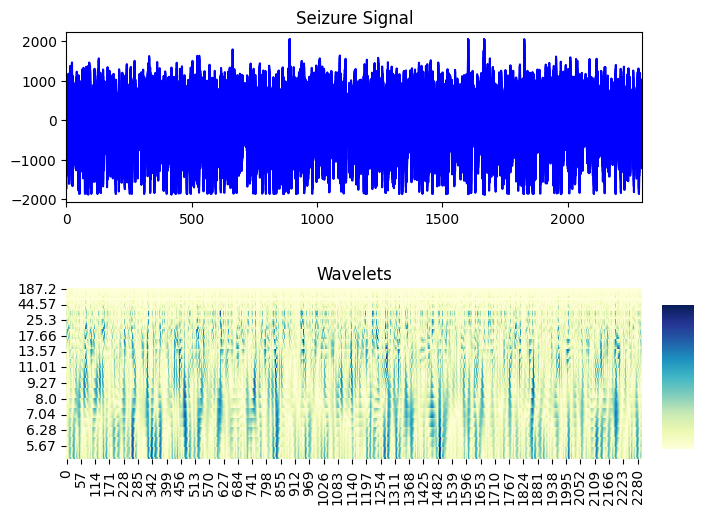

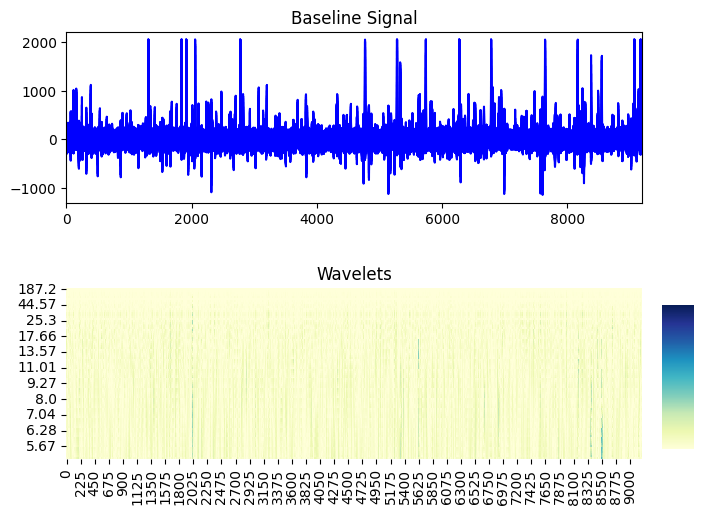

In [15]:
def plot_cwt_scalogram(signal, wt_data, interpolation, class_name):

  cmap = plt.cm.cool
  x = range(len(signal))

  fig, (sig_ax, spec_ax) = plt.subplots(2)
  fig.subplots_adjust(hspace=0.5, bottom=.03, left=.07, right=.97, top=.92)

  sig_ax.set_title(class_name + " Signal")
  sig_ax.plot(x, signal, 'b')
  sig_ax.set_xlim(0, x[-1])

  cbar_ax = fig.add_axes([1, 0.05, 0.05, 0.3])
  spec_ax.set_title("Wavelets")
  sns.heatmap(wt_data.T.abs(), ax=spec_ax, cmap="YlGnBu", cbar_ax=cbar_ax,
              cbar_kws={"ticks":[]}
              )

  plt.show()

plot_cwt_scalogram(epil_seizure_df,
               seizure_wavelets,
               None, 'Seizure')

plot_cwt_scalogram(epil_baseline_df,
               baseline_wavelets,
               None, 'Baseline')

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np

seizure_wavelets = seizure_wavelets.replace([np.inf, -np.inf], np.nan).dropna()

mms = MinMaxScaler()
sc = StandardScaler()

wav_mms = mms.fit_transform(seizure_wavelets.values)
wav_scale = sc.fit_transform(seizure_wavelets.values)

wav_mms_df = pd.DataFrame(wav_mms, columns=seizure_wavelets.columns)
wav_scale_df = pd.DataFrame(wav_scale, columns=seizure_wavelets.columns)

print('Before Scaling')
display(seizure_wavelets.head())

print('After MinMaxScaler')
display(wav_mms_df.head())

print('After StandardScaler')
display(wav_scale_df.head())

Before Scaling


,187.20,133.72,104.00,85.09,72.00,62.40,55.06,49.26,44.57,40.70,...,5.89,5.81,5.74,5.67,5.60,5.54,5.47,5.41,5.35,5.29
0,0.009479,22.123275,-53.595664,-61.044294,43.346130,3.733650,63.600299,117.133574,115.761499,43.025013,...,-43.868430,-38.433700,-12.133929,10.382505,-88.527551,-90.543111,-83.675898,-92.213665,-61.722789,-155.678157
1,0.001567,1.275921,5.804444,29.310953,-98.322898,0.916545,37.140512,-45.759531,-168.055956,-189.602844,...,-135.906927,-110.021524,-146.248908,-123.936047,-171.578619,-190.339303,-178.741703,-136.775720,-142.130267,-188.350585
2,-0.014379,-22.956562,49.076916,39.684658,24.529606,-6.072315,-81.949764,-91.122967,11.195230,157.522050,...,-198.742977,-206.744381,-175.368214,-198.817415,-191.508290,-164.867902,-146.767257,-183.590203,-169.135135,-97.114851
3,0.009804,20.984664,-53.674200,-68.865611,75.152319,3.634643,36.938752,120.204847,155.706915,46.896841,...,-160.473006,-180.048913,-160.251680,-149.386624,-92.766434,-97.150565,-130.697571,-125.381158,-139.652607,-50.384907
4,0.001294,-4.299773,18.114429,39.949654,-92.976517,1.237314,9.980902,-63.772734,-182.616590,-214.404240,...,-55.515318,-53.780160,-118.992367,-113.282170,15.912203,-38.108672,-28.502965,-20.317088,-27.898410,60.669757


After MinMaxScaler


,187.20,133.72,104.00,85.09,72.00,62.40,55.06,49.26,44.57,40.70,...,5.89,5.81,5.74,5.67,5.60,5.54,5.47,5.41,5.35,5.29
0,0.628091,0.651349,0.328122,0.330038,0.544984,0.622852,0.611304,0.716466,0.625799,0.500452,...,0.464470,0.467756,0.486664,0.510294,0.455159,0.444899,0.457241,0.465491,0.485137,0.440693
1,0.521277,0.505286,0.503513,0.558515,0.301673,0.530731,0.564113,0.475745,0.329831,0.269502,...,0.421645,0.435266,0.427207,0.452178,0.420249,0.402948,0.417266,0.447484,0.450833,0.426976
2,0.306013,0.335507,0.631283,0.584747,0.512668,0.302191,0.351719,0.408708,0.516756,0.614123,...,0.392407,0.391370,0.414297,0.419779,0.411872,0.413656,0.430711,0.428566,0.439313,0.465281
3,0.632486,0.643371,0.327890,0.310261,0.599610,0.619615,0.563754,0.721004,0.667455,0.504296,...,0.410214,0.403485,0.420999,0.441166,0.453378,0.442121,0.437468,0.452088,0.451891,0.484900
4,0.517594,0.466222,0.539860,0.585417,0.310855,0.541220,0.515675,0.449125,0.314647,0.244880,...,0.459051,0.460791,0.439291,0.456788,0.499060,0.466940,0.480441,0.494545,0.499567,0.531526


After StandardScaler


,187.20,133.72,104.00,85.09,72.00,62.40,55.06,49.26,44.57,40.70,...,5.89,5.81,5.74,5.67,5.60,5.54,5.47,5.41,5.35,5.29
0,1.046901,1.308145,-1.352084,-1.327772,0.634701,1.008611,1.010402,1.434040,1.024061,0.349231,...,-0.136159,-0.119012,-0.037550,0.031619,-0.271768,-0.276573,-0.256701,-0.282009,-0.189093,-0.475137
1,0.172825,0.075079,0.146827,0.637911,-1.439309,0.247442,0.589861,-0.560594,-1.486696,-1.538445,...,-0.421763,-0.340502,-0.450899,-0.380080,-0.526599,-0.581248,-0.548104,-0.418183,-0.435087,-0.574800
2,-1.588717,-1.358208,1.238770,0.863591,0.359230,-1.640916,-1.302909,-1.116071,0.099028,1.278326,...,-0.616749,-0.639760,-0.540646,-0.609599,-0.587751,-0.503485,-0.450093,-0.561240,-0.517704,-0.296498
3,1.082872,1.240799,-1.354066,-1.497925,1.100338,0.981859,0.586655,1.471648,1.377433,0.380650,...,-0.497994,-0.557165,-0.494056,-0.458089,-0.284775,-0.296746,-0.400835,-0.383363,-0.427507,-0.153954
4,0.142689,-0.254709,0.457459,0.869356,-1.361039,0.334112,0.158198,-0.781166,-1.615505,-1.739698,...,-0.172300,-0.166493,-0.366893,-0.347425,0.048691,-0.116492,-0.087580,-0.062305,-0.085613,0.184803


In [17]:
seizure_wavelets  = seizure_wavelets.copy();  seizure_wavelets ['y'] = 1
baseline_wavelets = baseline_wavelets.copy(); baseline_wavelets['y'] = 0

all_wavelets = pd.concat([seizure_wavelets, baseline_wavelets], ignore_index=True)

all_wavelets = (
    all_wavelets
    .replace([np.inf, -np.inf], np.nan)
    .dropna()
    .reset_index(drop=True)
)

clean_seizure_wave  = all_wavelets[all_wavelets['y'] == 1].drop(columns='y')
clean_baseline_wave = all_wavelets[all_wavelets['y'] == 0].drop(columns='y')

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(all_wavelets.drop(columns='y'))

seizure_scaled   = scaler.transform(clean_seizure_wave)
baseline_scaled  = scaler.transform(clean_baseline_wave)

seizure_scaled_df  = pd.DataFrame(seizure_scaled,  columns=clean_seizure_wave.columns)
baseline_scaled_df = pd.DataFrame(baseline_scaled, columns=clean_baseline_wave.columns)

pd.DataFrame(seizure_scaled_df, columns = seizure_wavelets.columns).head()
pd.DataFrame(baseline_scaled_df, columns = baseline_wavelets.columns).head()

,187.2,133.72,104.0,85.09,72.0,62.4,55.06,49.26,44.57,40.7,...,5.81,5.74,5.67,5.6,5.54,5.47,5.41,5.35,5.29,y
0,0.633224,0.641116,-0.691848,-0.742337,0.520492,0.596301,0.476545,0.884561,0.764008,0.378695,...,0.230868,0.270270,0.291433,0.124768,0.160665,0.162366,0.175526,0.186117,0.047623,NaN
1,0.623688,0.507311,-0.361275,0.008980,-0.811876,0.614548,0.906904,0.250282,-0.577319,-0.846324,...,-0.019481,-0.009077,0.076656,-0.147053,-0.136663,-0.105399,0.005907,-0.010219,-0.198645,NaN
2,-0.839147,-0.372890,0.400131,0.430214,-0.357313,-0.832731,-0.249560,-0.714278,-0.505440,0.125207,...,-0.298257,-0.242839,-0.213354,-0.386837,-0.354382,-0.261371,-0.264818,-0.182146,-0.334921,NaN
3,-0.370537,-0.395850,0.305517,0.070171,0.491792,-0.461779,-0.587991,-0.173646,0.411961,0.533214,...,-0.470133,-0.400678,-0.395557,-0.434272,-0.382880,-0.385179,-0.392204,-0.345937,-0.324297,NaN
4,0.577148,0.449435,-0.465827,-0.465721,0.260985,0.595260,0.267842,0.547668,0.337199,-0.141592,...,-0.416882,-0.451807,-0.437757,-0.329154,-0.368612,-0.409974,-0.379754,-0.386603,-0.319095,NaN


# **Feature Extraction (CNN AUTOENCODER)**

In [19]:
X = pd.concat([seizure_scaled_df, baseline_scaled_df], axis=0)
y = np.array([1]*len(seizure_scaled_df) + [0]*len(baseline_scaled_df))

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (11500, 87)
Shape of y: (11500,)


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Train class distribution:\n", pd.Series(y_train).value_counts())
print("Test class distribution:\n", pd.Series(y_test).value_counts())

Train class distribution:
 0    6440
1    1610
Name: count, dtype: int64
Test class distribution:
 0    2760
1     690
Name: count, dtype: int64


In [43]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, Flatten, Dense, Reshape, Cropping1D
from tensorflow.keras.optimizers import Adam

X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

input_shape = X_train.shape[1:]

input_layer = Input(shape=input_shape)

x = Conv1D(16, 3, activation='relu', padding='same')(input_layer)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(8, 3, activation='relu', padding='same')(x)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(4, 3, activation='relu', padding='same')(x)
encoded = MaxPooling1D(2, padding='same')(x)

x = Conv1D(4, 3, activation='relu', padding='same')(encoded)
x = UpSampling1D(2)(x)
x = Conv1D(8, 3, activation='relu', padding='same')(x)
x = UpSampling1D(2)(x)
x = Conv1D(16, 3, activation='relu', padding='same')(x)
x = UpSampling1D(2)(x)

decoded = Conv1D(1, 3, activation='sigmoid', padding='same')(x)
decoded = Cropping1D(cropping=(0, 1))(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(1e-3), loss='mse')
autoencoder.summary()

autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.1)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 87, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 87, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 44, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 44, 8)          │           392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 22, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 22, 4)          │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 11, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 11, 4)          │            52 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_3 (UpSampling1D)  │ (None, 22, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 22, 8)          │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_4 (UpSampling1D)  │ (None, 44, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 44, 16)         │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_5 (UpSampling1D)  │ (None, 88, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 88, 1)          │            49 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cropping1d_1 (Cropping1D)       │ (None, 87, 1)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,161 (4.54 KB)

 Trainable params: 1,161 (4.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 1.0802 - val_loss: 0.7948
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.7789 - val_loss: 0.7918
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.7161 - val_loss: 0.7899
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.7191 - val_loss: 0.7894
Epoch 5/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.7687 - val_loss: 0.7854
Epoch 6/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.7496 - val_loss: 0.7822
Epoch 7/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.7788 - val_loss: 0.7812
Epoch 8/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.7206 - val_loss: 0.7792
Epoch 9/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.7494 - val_loss: 0.7773
Epoch 10/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.7559 - val_loss: 0.7750
Epoch 11/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.7675 - val_loss: 0.7738
Epoch 12/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 12

In [44]:
encoder = Model(inputs=input_layer, outputs=encoded)

X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

X_train_flat = X_train_encoded.reshape((X_train_encoded.shape[0], -1))
X_test_flat = X_test_encoded.reshape((X_test_encoded.shape[0], -1))

252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [45]:
print(pd.Series(y).value_counts())
print("X shape:", X_train_encoded.shape)

0    9200
1    2300
Name: count, dtype: int64
X shape: (8050, 11, 4)


In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_flat, y_train)

print("After SMOTE:")
print("X shape:", X_train_smote.shape)
print("y distribution:", pd.Series(y_train_smote).value_counts())

After SMOTE:
X shape: (12880, 44)
y distribution: 0    6440
1    6440
Name: count, dtype: int64


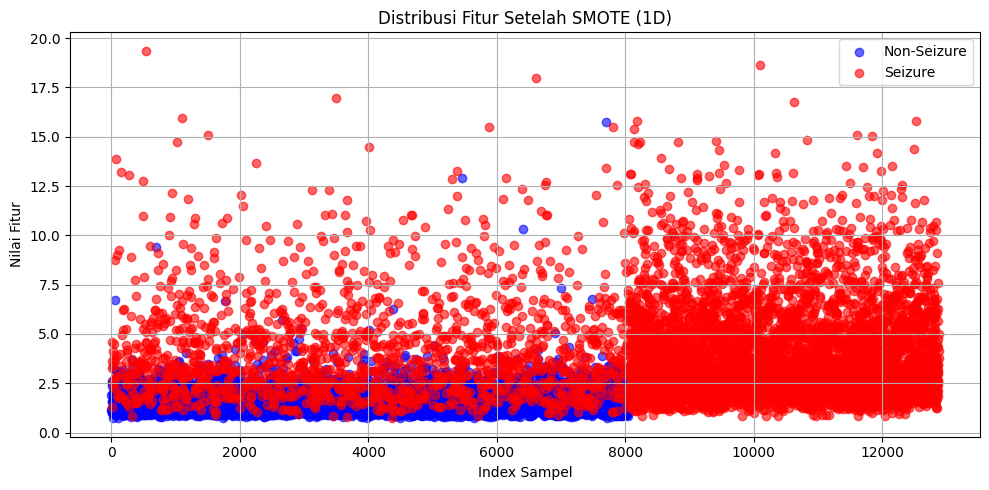

In [47]:
import matplotlib.pyplot as plt
import numpy as np

x = X_train_smote[:, 0]
indices = np.arange(len(x))

plt.figure(figsize=(10, 5))
plt.scatter(indices[y_train_smote == 0], x[y_train_smote == 0], color='blue', label='Non-Seizure', alpha=0.6)
plt.scatter(indices[y_train_smote == 1], x[y_train_smote == 1], color='red', label='Seizure', alpha=0.6)
plt.title("Distribusi Fitur Setelah SMOTE (1D)")
plt.xlabel("Index Sampel")
plt.ylabel("Nilai Fitur")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

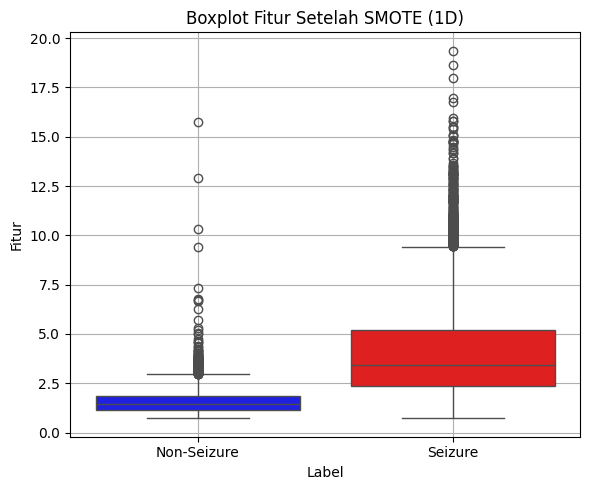

In [48]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df_plot = pd.DataFrame({
    'Fitur': X_train_smote[:, 0],
    'Label': y_train_smote
})

plt.figure(figsize=(6, 5))
sns.boxplot(x='Label', y='Fitur', data=df_plot, hue='Label', palette={0: 'blue', 1: 'red'}, legend=False)
plt.xticks([0, 1], ['Non-Seizure', 'Seizure'])
plt.title("Boxplot Fitur Setelah SMOTE (1D)")
plt.grid(True)
plt.tight_layout()
plt.show()

# **CLASSIFICATION (LR + SVM)**

Accuracy: 0.981159420289855


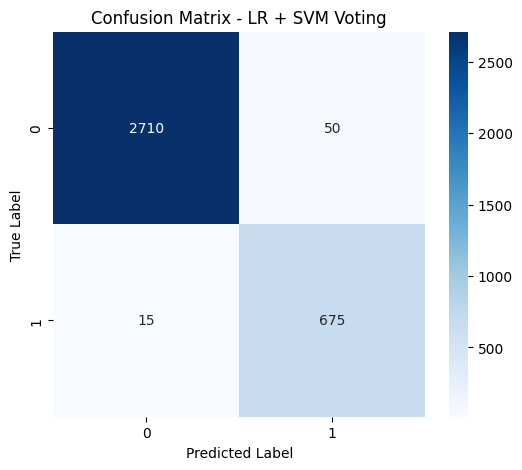

Cross-Validation Accuracy: 0.9888975155279504

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2760
           1       0.93      0.98      0.95       690

    accuracy                           0.98      3450
   macro avg       0.96      0.98      0.97      3450
weighted avg       0.98      0.98      0.98      3450



In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(max_iter=1000, random_state=42)

svm = SVC(kernel='rbf', probability=True, random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('lr', lr),
    ('svm', svm)
], voting='soft')

scores = cross_val_score(voting_clf, X_train_smote, y_train_smote, cv=5)

voting_clf.fit(X_train_smote, y_train_smote)

y_pred = voting_clf.predict(X_test_flat)

print("Accuracy:", accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LR + SVM Voting")
plt.show()

print("Cross-Validation Accuracy:", scores.mean())
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [57]:
import joblib

joblib.dump(voting_clf, 'voting_model.pkl')

['voting_model.pkl']